In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
path='/content/drive/MyDrive/P2M_CSV/df2-7.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df_new = df[df['debit'] != 0][['debit']]

In [ ]:
df_new = df_new.reset_index(drop=True)

In [ ]:
df_new['duration'] = 1
for i in range(1, len(df_new)):
    if df_new['debit'][i] == df_new['debit'][i-1]:
        df_new['duration'][i] = df_new['duration'][i-1] + 1

<ipython-input-7-2354b1d70245>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['duration'][i] = df_new['duration'][i-1] + 1


In [ ]:
df_new.index.name = 'id'

In [ ]:
df_new['duration']=df_new['duration']*15

In [ ]:
df_new1 = df_new.query('duration <= 75')


In [ ]:
df_new1 = df_new1.query('debit <= 2.5')

In [ ]:
X = df_new1[['debit', 'duration']]

In [ ]:
X = (X - X.mean()) / X.std()

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
df_new1['label'] = kmeans.labels_

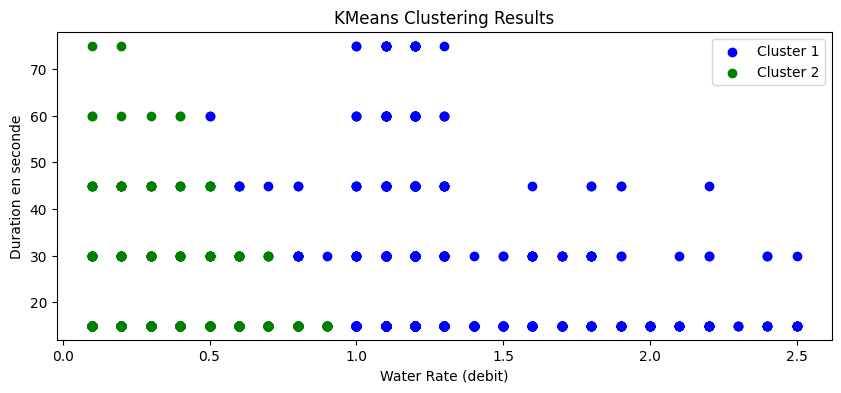

In [ ]:
colors = ['blue', 'green']
fig = plt.figure(figsize=(10,4)) # Set the figure size to 8 inches wide and 6 inches tall
for i in range(2):
    plt.scatter(df_new1[df_new1['label'] == i]['debit'], df_new1[df_new1['label'] == i]['duration'], c=colors[i], label='Cluster {}'.format(i+1))
plt.xlabel('Water Rate (debit)')
plt.ylabel('Duration en seconde')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()


In [ ]:
df_new1.head()

,debit,duration,label
id,,,
0,1.3,15,1
1,1.6,15,1
2,0.2,15,1
3,0.3,15,1
4,0.2,15,1
